In [ ]:
#Importing Necessary Libraries
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
#Importing the dataset
df = pd.read_csv(r"/content/PS_20174392719_1491204439457_log.csv")

In [ ]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [ ]:
df.shape

(151799, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151799 entries, 0 to 151798
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            151799 non-null  int64  
 1   type            151799 non-null  object 
 2   amount          151799 non-null  float64
 3   nameOrig        151799 non-null  object 
 4   oldbalanceOrg   151799 non-null  float64
 5   newbalanceOrig  151798 non-null  float64
 6   nameDest        151798 non-null  object 
 7   oldbalanceDest  151798 non-null  float64
 8   newbalanceDest  151798 non-null  float64
 9   isFraud         151798 non-null  float64
 10  isFlaggedFraud  151798 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 12.7+ MB


In [ ]:
#Calculating the number of Fraud
df["isFraud"].sum()

131.0

In [ ]:
#Overall Number of Rows
df["isFraud"].shape[0]

151799

<Axes: xlabel='isFraud', ylabel='count'>

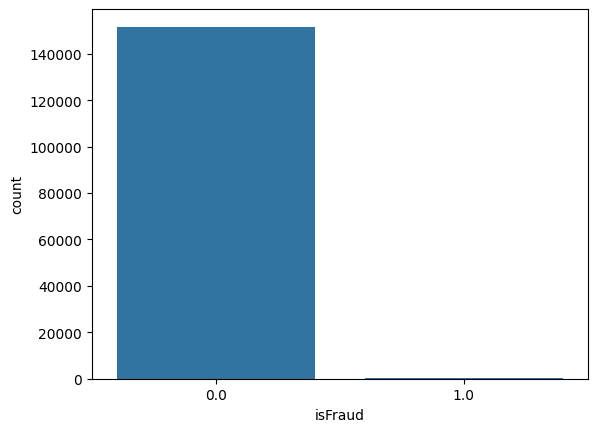

In [ ]:
#Ploting isFraud (0 vs 1)
import seaborn as sns
sns.countplot(x ="isFraud", data = df)

In [ ]:
#Checking the null values #data cleaning and preprocessing
df.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,1
nameDest,1
oldbalanceDest,1
newbalanceDest,1
isFraud,1


In [ ]:
#Number of Unique Values
df["nameDest"].nunique()

74709

In [ ]:
#Total Number of Rows
df["nameDest"].shape[0]

151799

In [ ]:
print("Repeated Values : ")
print(6362620-2722362)
#Visualizing the Count of Types of Transaction Made
df["type"].value_counts()

Repeated Values : 
3640258


,count
type,
PAYMENT,57889
CASH_OUT,48858
CASH_IN,30820
TRANSFER,12851
DEBIT,1381


<Axes: xlabel='type', ylabel='count'>

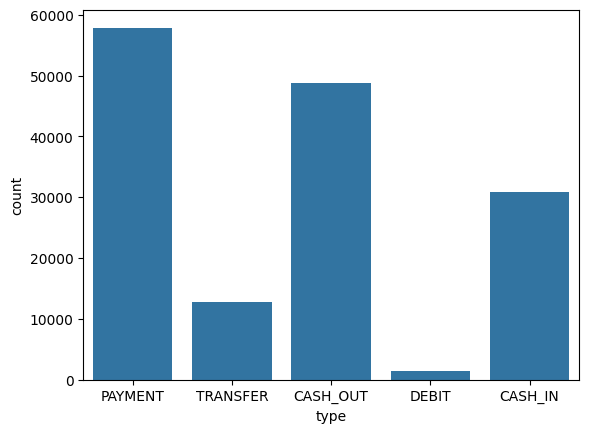

In [ ]:
sns.countplot(x ="type", data = df)

In [ ]:
df["amount"].describe()

,amount
count,1.517990e+05
mean,1.791774e+05
std,3.401606e+05
min,3.200000e-01
25%,1.111398e+04
50%,6.122687e+04
75%,2.230398e+05
max,1.000000e+07


In [ ]:
#Checking IsFlaggedFraud Column Accuracy
# Convert NaN values to 0
df["isFraud"] = df["isFraud"].fillna(0)
# Convert NaN values in "isFlaggedFraud" to 0
df["isFlaggedFraud"] = df["isFlaggedFraud"].fillna(0)
cm = confusion_matrix(df["isFraud"], df["isFlaggedFraud"])
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[151668      0]
 [   131      0]]


In [ ]:
df[df["isFraud"] == 1]["amount"].describe()

,amount
count,1.310000e+02
mean,6.009472e+05
std,1.537357e+06
min,1.640000e+02
25%,1.494984e+04
50%,3.506363e+04
75%,3.507057e+05
max,1.000000e+07


In [ ]:
fraud = df[df['isFraud'] == 1]
normal = df[df['isFraud'] == 0]

# Calculate the maximum 'amount' for fraud and normal cases
max_fraud_amount = fraud["amount"].max()
max_normal_amount = normal["amount"].max()

# Print the results
#print("Is the sum of 'isFlaggedFraud' equal to the total number of fraud cases?", is_flagged_fraud_equals_total)
print("Maximum 'amount' for fraud cases:", max_fraud_amount)
print("Maximum 'amount' for normal cases:", max_normal_amount)
print("Total number of fraud cases:", fraud.shape[0])

Maximum 'amount' for fraud cases: 10000000.0
Maximum 'amount' for normal cases: 6419835.27
Total number of fraud cases: 131


<Axes: xlabel='type', ylabel='count'>

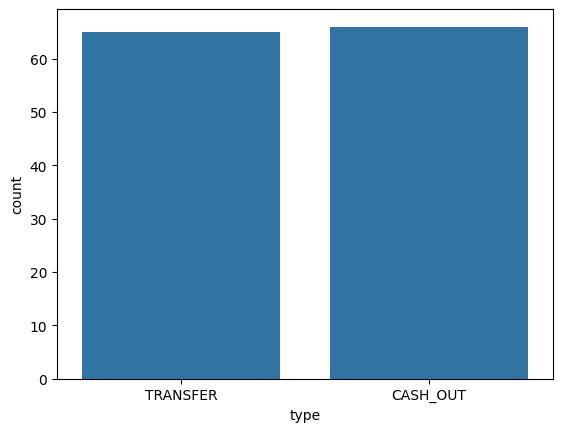

In [ ]:
sns.countplot(x ="type", data = fraud)

In [ ]:
dict={}
for i in fraud["amount"]:
    if i  not in dict:
        dict[i]=1
    else:
        dict[i]=dict[i]+1

In [ ]:
%%capture
dict

In [ ]:
max_key = None
max_value = None

for key, value in dict.items():
    if max_value is None or value > max_value:
        max_key = key
        max_value = value
print("Amount corresponding to Maximum number of Transaction :", max_key)
print("Count of Maximum number of Transction to a particular Amount", max_value)

Amount corresponding to Maximum number of Transaction : 181.0
Count of Maximum number of Transction to a particular Amount 2


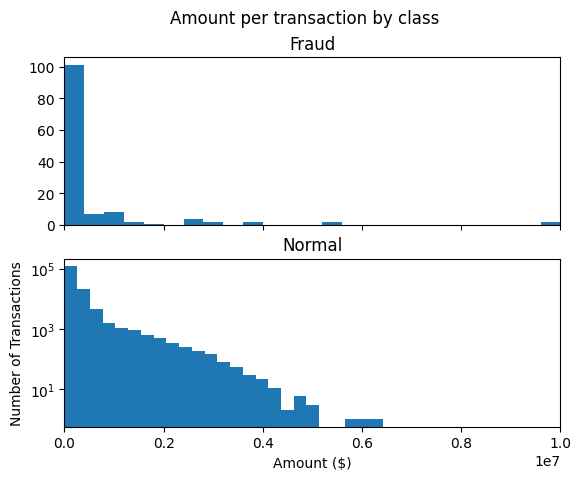

In [ ]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 25
ax1.hist(fraud.amount, bins = bins)
ax1.set_title('Fraud')
ax2.hist(normal.amount, bins = bins)
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 10000000 ))
plt.yscale('log')
plt.show();

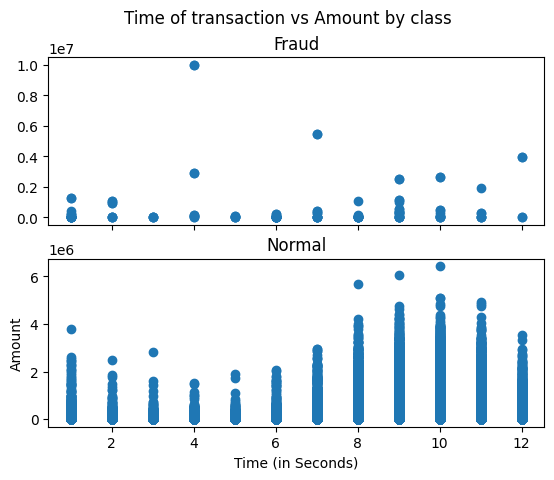

In [ ]:
# We Will check Do fraudulent transactions occur more often during certain time frame ? Let us find out with a visual representation.

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(fraud.step, fraud.amount)
ax1.set_title('Fraud')
ax2.scatter(normal.step, normal.amount)
ax2.set_title('Normal')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

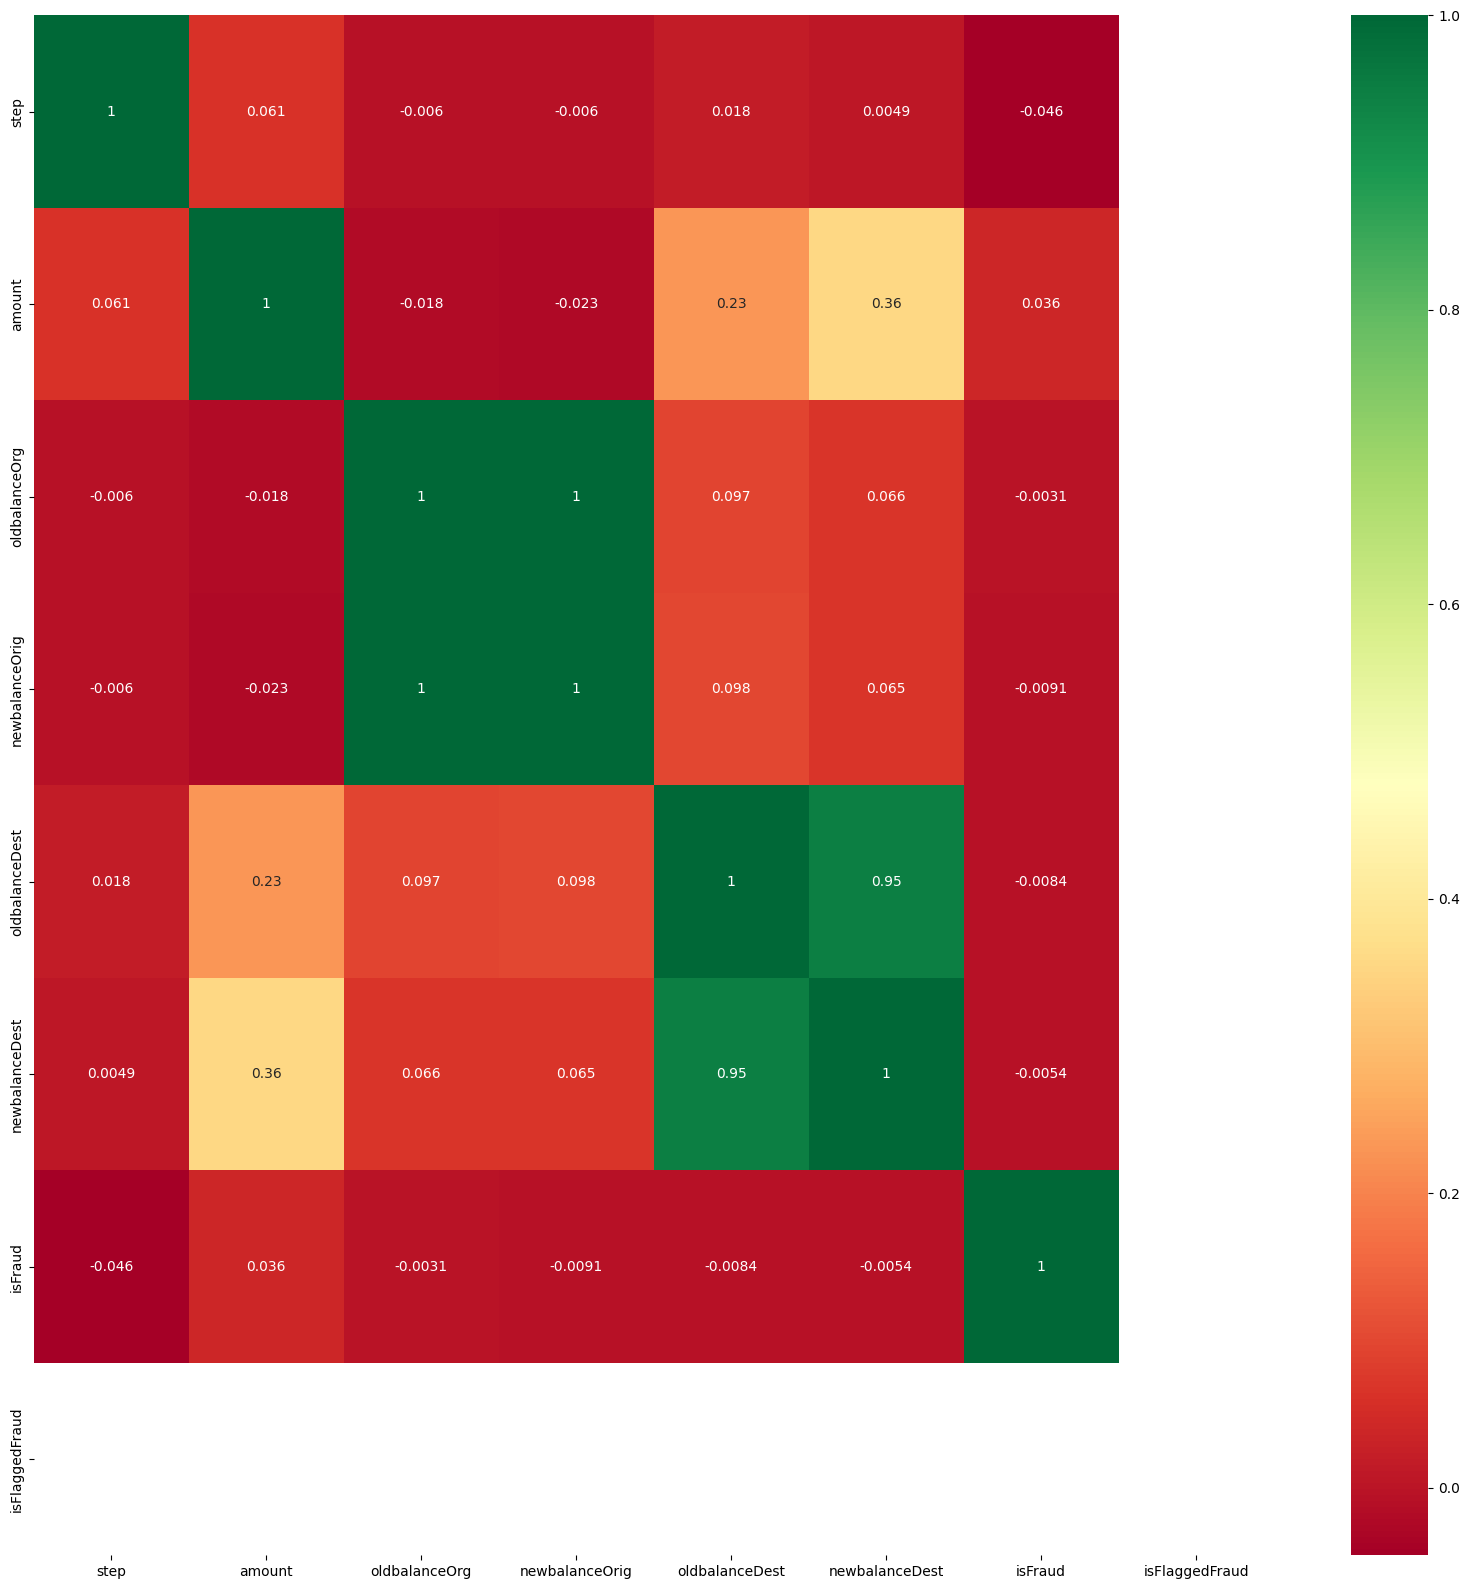

In [ ]:
#Ploting the heatmap for Checking the Correlation between variables
data1 = df.sample(frac = 0.1,random_state=1) #(for 10% of data)
## Correlation
import seaborn as sns
#get correlations of each features in dataset
corrmat = data1.corr(numeric_only=True)
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

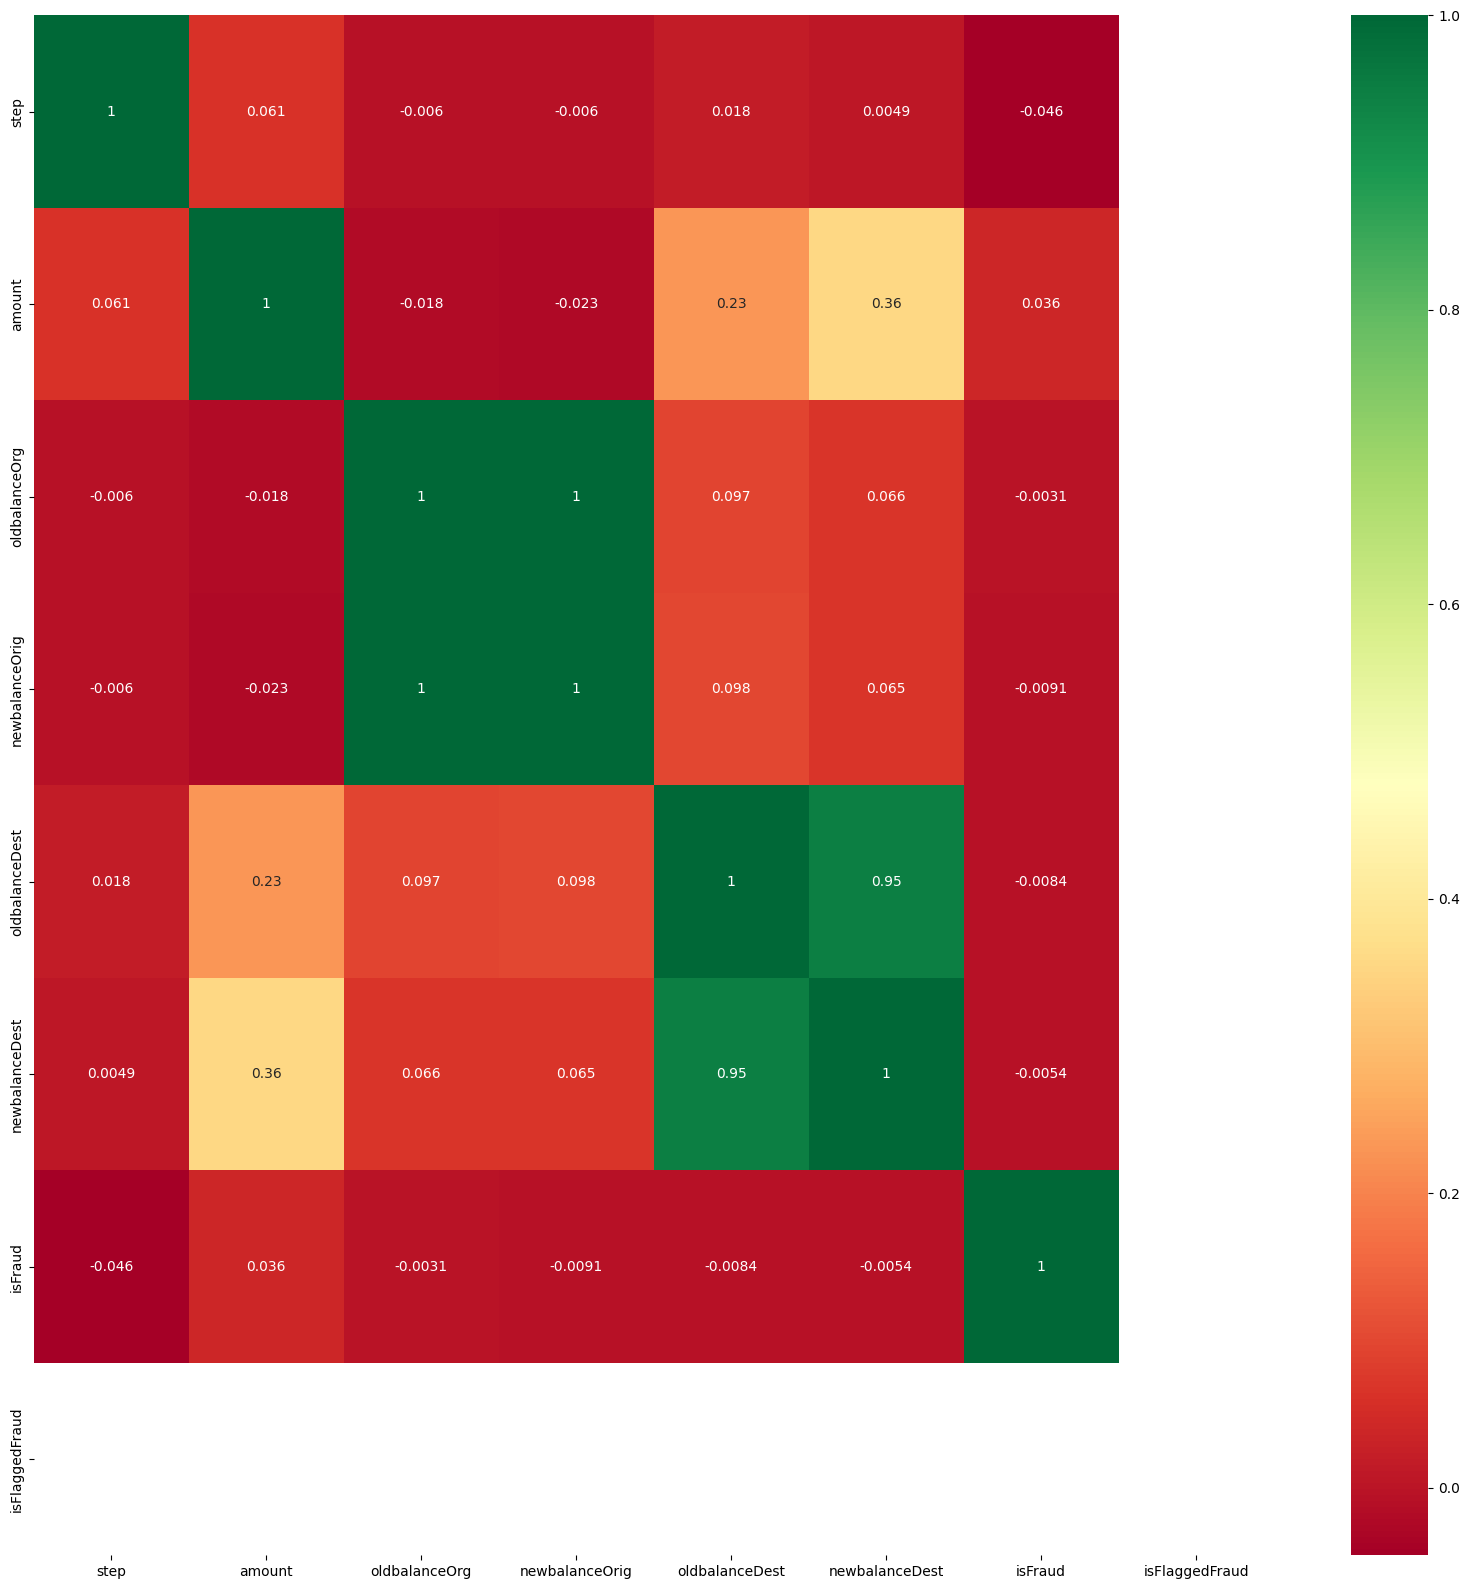

In [ ]:
#For whole data
corrmat = df.corr(numeric_only=True)
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")


In [ ]:
Fraud = data1[data1['isFraud']==1]

Valid = data1[data1['isFraud']==0]

outlier_fraction = len(Fraud)/float(len(Valid))
outlier_fraction

0.001187178472497032

In [ ]:
columns = data1.columns.tolist()
# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["Class"]]
# Store the variable we are predicting
target = "isFraud"
# Define a random state
state = np.random.RandomState(42)
X = data1[columns]
Y = data1[target]
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
# Print the shapes of X & Y
print(X.shape)

(15180, 11)


In [ ]:
Y.sum()

18.0

In [ ]:
%%capture
!pip install tensorflow
import tensorflow
from tensorflow.keras.utils import to_categorical

In [ ]:
X = pd.get_dummies(X, columns=["type"])

In [ ]:
## Check if the columns exist before attempting to drop them
if 'nameDest' in X.columns:
    X.drop('nameDest', axis=1, inplace=True)
if 'isFlaggedFraud' in X.columns:
    X.drop('isFlaggedFraud' , axis=1 , inplace = True)
if 'nameOrig' in X.columns:
    X.drop('nameOrig' , axis=1 , inplace = True)

In [ ]:
#Define the outlier detection methods

classifiers ={

    "Isolation Forest":IsolationForest(n_estimators=100, max_samples=len(X),
                                       contamination=outlier_fraction,random_state=state, verbose=0),
    "Local Outlier Factor":LocalOutlierFactor(n_neighbors=20, algorithm='auto',
                                              leaf_size=30, metric='minkowski',
                                              p=2, metric_params=None, contamination=outlier_fraction),

            }

In [ ]:
# Impute missing values using the SimpleImputer

!pip install scikit-learn
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy="mean") # Replace missing values using the mean
X = imp.fit_transform(X)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

n_outliers = len(Fraud)

for i, (clf_name, clf) in enumerate(classifiers.items()):
    # Fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_prediction = clf.negative_outlier_factor_
    else:
        clf.fit(X)
        scores_prediction = clf.decision_function(X)
        y_pred = clf.predict(X)

    # Reshape the prediction values to 0 for Valid transactions, 1 for Fraud transactions
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1

    n_errors = (y_pred != Y).sum()
    # Run Classification Metrics
    print("{}: {}".format(clf_name, n_errors))
    print("Accuracy Score:")
    print(accuracy_score(Y, y_pred))
    print("Classification Report:")
    print(classification_report(Y, y_pred))

    # Calculate and print the confusion matrix
    cm = confusion_matrix(Y, y_pred)
    print("Confusion Matrix:")
    print(cm)

    print("--------------------")

Isolation Forest: 27
Accuracy Score:
0.9982213438735178
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     15162
         1.0       0.26      0.28      0.27        18

    accuracy                           1.00     15180
   macro avg       0.63      0.64      0.63     15180
weighted avg       1.00      1.00      1.00     15180

Confusion Matrix:
[[15148    14]
 [   13     5]]
--------------------
Local Outlier Factor: 37
Accuracy Score:
0.997562582345191
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     15162
         1.0       0.00      0.00      0.00        18

    accuracy                           1.00     15180
   macro avg       0.50      0.50      0.50     15180
weighted avg       1.00      1.00      1.00     15180

Confusion Matrix:
[[15143    19]
 [   18     0]]
--------------------


In [ ]:
# Handle multi-collinearity
import pandas as pd

# Ensure the number of columns matches the data shape
# You may need to investigate why there's a mismatch
# and update 'columns' with the correct column names
if len(X[0]) != len(columns):
  print(f"Mismatch in number of columns: data has {len(X[0])}, columns has {len(columns)}")
  # Add a placeholder column name
  columns.append('unknown_col')

# Convert the NumPy array X back to a Pandas DataFrame
X = pd.DataFrame(X, columns=columns)  # Use the original column names

corr = X.corr()
print(corr)
high_corr_cols = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool_)).abs()
to_drop = [column for column in high_corr_cols.columns if any(high_corr_cols[column] > 0.8)]
new_data = X.drop(to_drop, axis=1)

Mismatch in number of columns: data has 12, columns has 11
                    step      type    amount  nameOrig  oldbalanceOrg  \
step            1.000000  0.061038 -0.005990 -0.006254       0.011777   
type            0.061038  1.000000 -0.017656 -0.021803       0.218112   
amount         -0.005990 -0.017656  1.000000  0.999057       0.108758   
nameOrig       -0.006254 -0.021803  0.999057  1.000000       0.109732   
oldbalanceOrg   0.011777  0.218112  0.108758  0.109732       1.000000   
newbalanceOrig -0.002404  0.348161  0.075804  0.074509       0.945535   
nameDest       -0.055672  0.019125 -0.006413 -0.010910      -0.006921   
oldbalanceDest  0.011441 -0.004902  0.534588  0.555648       0.116684   
newbalanceDest  0.114809  0.046440 -0.193928 -0.203683       0.118009   
isFraud        -0.062428 -0.049092 -0.025403 -0.025699       0.011643   
isFlaggedFraud -0.093947 -0.390963 -0.200776 -0.204324      -0.302808   
unknown_col    -0.023484  0.618259 -0.086689 -0.094340       0.15

In [ ]:
##Define the outlier detection methods

classifiers ={

    "Isolation Forest":IsolationForest(n_estimators=100, max_samples=len(X),
                                       contamination=outlier_fraction,random_state=state, verbose=0),
    "Local Outlier Factor":LocalOutlierFactor(n_neighbors=20, algorithm='auto',
                                              leaf_size=30, metric='minkowski',
                                              p=2, metric_params=None, contamination=outlier_fraction),

            }

for i, (clf_name, clf) in enumerate(classifiers.items()):
    # Fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_prediction = clf.negative_outlier_factor_
    else:
        clf.fit(X)
        scores_prediction = clf.decision_function(X)
        y_pred = clf.predict(X)

    # Reshape the prediction values to 0 for Valid transactions, 1 for Fraud transactions
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1

    n_errors = (y_pred != Y).sum()
    # Run Classification Metrics
    print("{}: {}".format(clf_name, n_errors))
    print("Accuracy Score:")
    print(accuracy_score(Y, y_pred))
    print("Classification Report:")
    print(classification_report(Y, y_pred))

    # Calculate and print the confusion matrix
    cm = confusion_matrix(Y, y_pred)
    print("Confusion Matrix:")
    print(cm)

    print("--------------------")

Isolation Forest: 31
Accuracy Score:
0.9979578392621871
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     15162
         1.0       0.16      0.17      0.16        18

    accuracy                           1.00     15180
   macro avg       0.58      0.58      0.58     15180
weighted avg       1.00      1.00      1.00     15180

Confusion Matrix:
[[15146    16]
 [   15     3]]
--------------------
Local Outlier Factor: 37
Accuracy Score:
0.997562582345191
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     15162
         1.0       0.00      0.00      0.00        18

    accuracy                           1.00     15180
   macro avg       0.50      0.50      0.50     15180
weighted avg       1.00      1.00      1.00     15180

Confusion Matrix:
[[15143    19]
 [   18     0]]
--------------------


In [ ]:
#Import the necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Define your features (X) and target variable (y)
X = new_data
y = Y

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

report = classification_report(y_test, y_pred)
print(f"Classification Report:\n{report}")

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3034
         1.0       1.00      1.00      1.00         2

    accuracy                           1.00      3036
   macro avg       1.00      1.00      1.00      3036
weighted avg       1.00      1.00      1.00      3036

